In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd  

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [6]:
RAW_DATA_PATH_X = '/Users/piyush/Desktop/dsml_Portfolio/visa/data/processed/X.csv'
RAW_DATA_PATH_y = '/Users/piyush/Desktop/dsml_Portfolio/visa/data/processed/y.csv'
X = pd.read_csv(RAW_DATA_PATH_X)
y = pd.read_csv(RAW_DATA_PATH_y)

In [36]:
from sklearn.model_selection import KFold
pipelines = []
pipelines.append(('LR' , (Pipeline([('LR' ,LogisticRegression())]))))
pipelines.append(('SVC' , (Pipeline([('SVC' ,LinearSVC())]))))
pipelines.append(('MNB' , (Pipeline([('MNB' ,MultinomialNB())]))))
pipelines.append(('RF' , (Pipeline([('RF' ,RandomForestClassifier())]))))
pipelines.append(('XGB' , (Pipeline([('XGB' ,XGBClassifier())]))))


model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    crossv_results = cross_val_score(model , X ,y ,cv =kfold , scoring='accuracy')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    

['LR']: 0.667896 (0.057330)
['LR', 'SVC']: 0.519545 (0.169937)
['LR', 'SVC', 'MNB']: 0.708713 (0.069526)
['LR', 'SVC', 'MNB', 'RF']: 0.667072 (0.031496)
['LR', 'SVC', 'MNB', 'RF', 'XGB']: 0.730926 (0.052619)


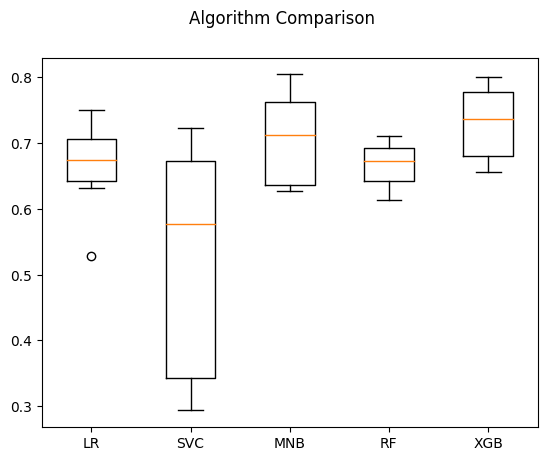

In [37]:
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()